In [ ]:
###load the npz file 

In [1]:
import numpy as np

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']


In [14]:
# Dimensions of dig_mnist dataset
dig_mnist_rows, dig_mnist_cols = dig_mnist_images.shape
print("Dimensions of dig_mnist dataset:")
print("Rows:", dig_mnist_rows)
print("Columns:", dig_mnist_cols)

# Dimensions of kannda_mnist_train dataset
kannda_mnist_train_rows, kannda_mnist_train_cols = kannda_mnist_train_images.shape
print("Dimensions of kannda_mnist_train dataset:")
print("Rows:", kannda_mnist_train_rows)
print("Columns:", kannda_mnist_train_cols)

# Dimensions of kannda_mnist_test dataset
kannda_mnist_test_rows, kannda_mnist_test_cols = kannda_mnist_test_images.shape
print("Dimensions of kannda_mnist_test dataset:")
print("Rows:", kannda_mnist_test_rows)
print("Columns:", kannda_mnist_test_cols)


Dimensions of dig_mnist dataset:
Rows: 10240
Columns: 784
Dimensions of kannda_mnist_train dataset:
Rows: 60000
Columns: 784
Dimensions of kannda_mnist_test dataset:
Rows: 10000
Columns: 784


In [ ]:
## reshape the data

In [2]:
import numpy as np
from sklearn.decomposition import PCA

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']

# Reshape the images to 2D arrays (flatten from 28x28 to 784 dimensions)
dig_mnist_images = dig_mnist_images.reshape((dig_mnist_images.shape[0], 28*28))
kannda_mnist_train_images = kannda_mnist_train_images.reshape((kannda_mnist_train_images.shape[0], 28*28))

# Perform PCA with 10 components
pca = PCA(n_components=10)
dig_mnist_images_pca = pca.fit_transform(dig_mnist_images)
kannda_mnist_train_images_pca = pca.transform(kannda_mnist_train_images)

# Reshape the test images to 2D arrays (flatten from 28x28 to 784 dimensions)
kannda_mnist_test_images = kannda_mnist_test_images.reshape((kannda_mnist_test_images.shape[0], 28*28))

# Perform PCA transformation on test images
kannda_mnist_test_images_pca = pca.transform(kannda_mnist_test_images)

# Print the shapes of the transformed images
print("Shape of dig_mnist images (PCA):", dig_mnist_images_pca.shape)
print("Shape of kannda_mnist train images (PCA):", kannda_mnist_train_images_pca.shape)
print("Shape of kannda_mnist test images (PCA):", kannda_mnist_test_images_pca.shape)


Shape of dig_mnist images (PCA): (10240, 10)
Shape of kannda_mnist train images (PCA): (60000, 10)
Shape of kannda_mnist test images (PCA): (10000, 10)


In [ ]:
# desision Tree

Precision: 0.7643752918619559
Recall: 0.7628999999999999
F1-Score: 0.762445494796317
Confusion Matrix:
[[652 200  10  34  19  10   6  12  38  19]
 [100 757   8  27  40  21  10  11   9  17]
 [  5   8 941   6   4  27   2   5   1   1]
 [ 37  41   4 753  32  39  27  55   5   7]
 [ 14  27   0  56 747  86  14   5  28  23]
 [ 12  25   9  19 205 689   3   9  22   7]
 [ 11  20   4  43  25   9 723 132   4  29]
 [ 41  29   2  39  24   5 199 626   5  30]
 [ 50  13   8   4  14  24   5   6 850  26]
 [ 10  23   2   2  18   1   7  10  36 891]]
ROC-AUC Score: 0.8682777777777778


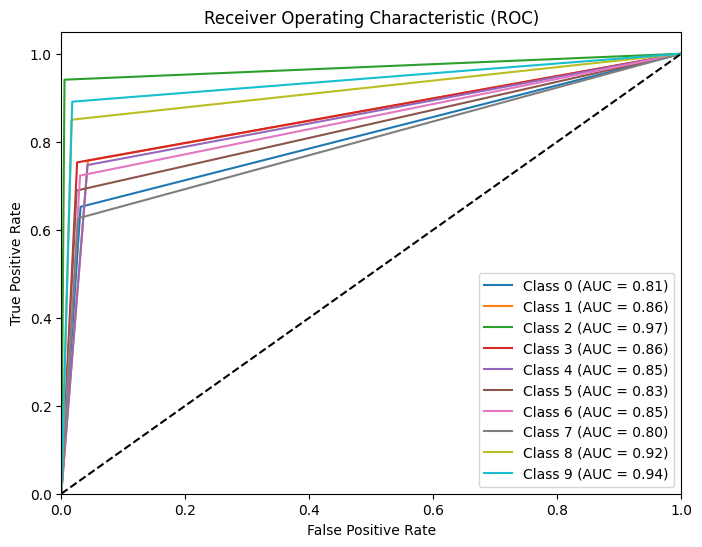

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier on the PCA-transformed training data
decision_tree.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = decision_tree.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class
probabilities = decision_tree.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Random Forest

Precision: 0.8635240005136093
Recall: 0.8593
F1-Score: 0.8590862431236191
Confusion Matrix:
[[747 190   0  26  11   1   3   8   8   6]
 [ 53 887   1  21  17   9   1   2   2   7]
 [  0   6 978   1   0  11   1   1   0   2]
 [ 16  12   3 886  26  23  10  23   1   0]
 [  2  12   0  40 889  31   6   5   9   6]
 [  6  16   0  11 178 776   0   4   9   0]
 [  6   8   4  37  37   5 822  67   2  12]
 [ 16  28   1  25   9   3 143 745   1  29]
 [ 32   4   3   2   8   8   2   2 928  11]
 [  3   8   0   1   5   0   6   3  39 935]]
ROC-AUC Score: 0.9863623944444443


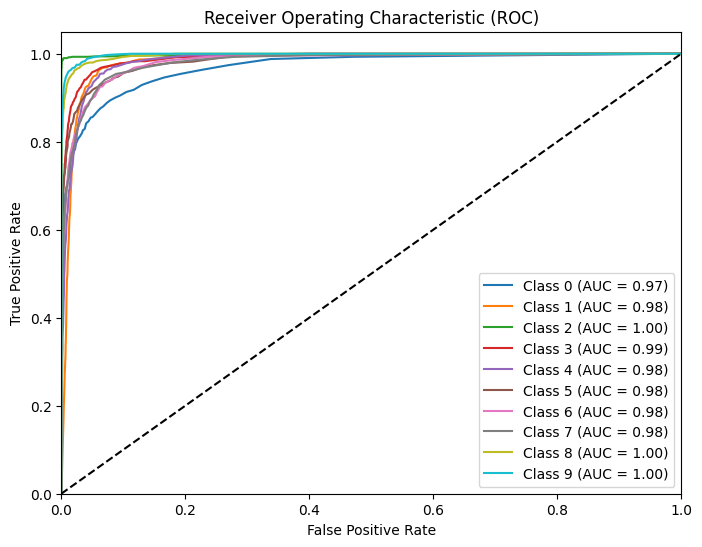

In [5]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
random_forest = RandomForestClassifier()

# Train the random forest classifier on the PCA-transformed training data
random_forest.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = random_forest.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class
probabilities = random_forest.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Naive Bayes Model

Precision: 0.7777081372381316
Recall: 0.7684
F1-Score: 0.7672534580002
Confusion Matrix:
[[604 226   1  77  35   1   0  12  23  21]
 [ 37 762   4  86  69   7   0   6  20   9]
 [  2   9 953   2   8  11   1   5   3   6]
 [  8  15   3 846  40  38  13  35   1   1]
 [  0   1   0  47 848  66   1   7  26   4]
 [  2  15   7  13 303 621   1  20  17   1]
 [  3  49   7  50  30  10 738  90   6  17]
 [ 28  24   0  79  11   7 181 635   3  32]
 [ 62  11   5   1   9   9   4  19 798  82]
 [ 12   5   1   3  11   0   5  16  68 879]]
ROC-AUC Score: 0.9700892888888889


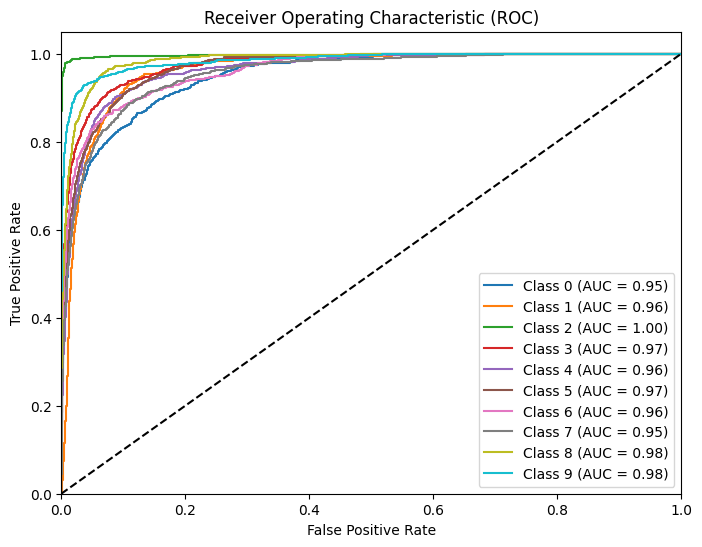

In [6]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the PCA-transformed training data
naive_bayes.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = naive_bayes.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class
probabilities = naive_bayes.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##K-NN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Create a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the K-NN classifier on the PCA-transformed training data
knn.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = knn.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class (not applicable for K-NN)

# Compute the ROC-AUC score (not applicable for K-NN)

# Compute the ROC curve for each class (not applicable for K-NN)

# Plot the ROC curves (not applicable for K-NN)


Precision: 0.8717312980130574
Recall: 0.8611000000000001
F1-Score: 0.8618688620034274
Confusion Matrix:
[[748 202   0  16  11   0   2   8   8   5]
 [ 59 909   0   5  20   1   0   0   1   5]
 [  2   6 972   2   0  13   2   1   1   1]
 [ 22  30   1 860  54  14   4  12   2   1]
 [  2  12   0  21 938  17   2   2   5   1]
 [  2  18   0   8 219 742   1   3   7   0]
 [  6  12   1  17  45   9 846  52   0  12]
 [ 15  26   1  39  27   0 138 747   1   6]
 [ 43   5   3   1   6   8   1   1 926   6]
 [  6  14   0   1  14   2   6   2  32 923]]


In [ ]:
##SVM

Precision: 0.8854794712876902
Recall: 0.8791
F1-Score: 0.8791629892012635
Confusion Matrix:
[[769 175   0  26  11   0   4   6   5   4]
 [ 39 919   1  13  17   3   1   1   1   5]
 [  0   8 981   1   0   7   1   1   1   0]
 [ 11  18   3 883  37  24   9  13   2   0]
 [  2   4   0  21 930  30   3   2   4   4]
 [  5  13   0   9 183 772   1   6  11   0]
 [  2  11   0  36  39   7 857  30   2  16]
 [ 16  24   0  28  14   3 112 781   2  20]
 [ 26   3   0   1   4   6   2   1 947  10]
 [  5  14   0   0   4   0   4   2  19 952]]
ROC-AUC Score: 0.9906630777777778


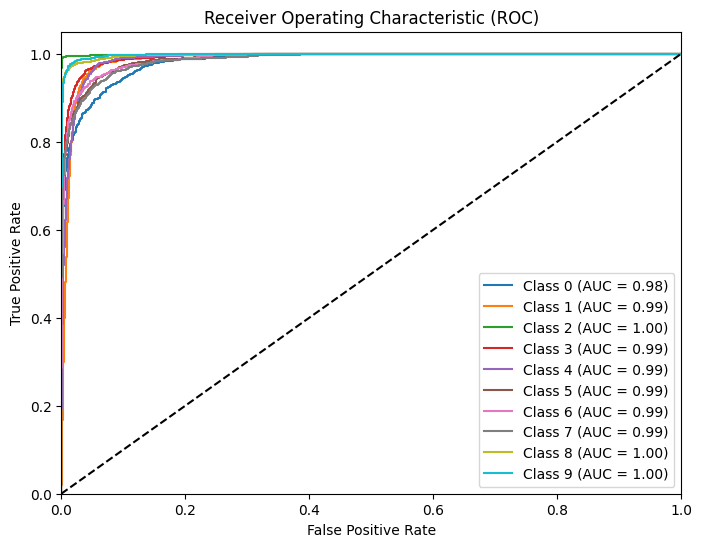

In [8]:
from sklearn.svm import SVC
# Create an SVM classifier
svm = SVC(kernel='rbf', C=1.0, probability=True)

# Train the SVM classifier on the PCA-transformed training data
svm.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = svm.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class
probabilities = svm.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# change the  component size 15 

In [72]:
import numpy as np
from sklearn.decomposition import PCA

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']

# Reshape the images to 2D arrays (flatten from 28x28 to 784 dimensions)
dig_mnist_images = dig_mnist_images.reshape((dig_mnist_images.shape[0], 28*28))
kannda_mnist_train_images = kannda_mnist_train_images.reshape((kannda_mnist_train_images.shape[0], 28*28))
kannda_mnist_test_images = kannda_mnist_test_images.reshape((kannda_mnist_test_images.shape[0], 28*28))

# Perform PCA with 15 components
pca = PCA(n_components=15)
dig_mnist_images_pca = pca.fit_transform(dig_mnist_images)
kannda_mnist_train_images_pca = pca.transform(kannda_mnist_train_images)
kannda_mnist_test_images_pca = pca.transform(kannda_mnist_test_images)

# Print the shapes of the transformed images
print("Shape of dig_mnist images (PCA):", dig_mnist_images_pca.shape)
print("Shape of kannda_mnist train images (PCA):", kannda_mnist_train_images_pca.shape)
print("Shape of kannda_mnist test images (PCA):", kannda_mnist_test_images_pca.shape)


Shape of dig_mnist images (PCA): (10240, 15)
Shape of kannda_mnist train images (PCA): (60000, 15)
Shape of kannda_mnist test images (PCA): (10000, 15)


In [26]:
import numpy as np

# Assuming your target variable is called 'kannda_mnist_test_labels'
unique_classes = np.unique(kannda_mnist_test_labels)
num_classes = len(unique_classes)

print("Number of classes:", num_classes)
print("Unique classes:", unique_classes)


Number of classes: 10
Unique classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
 ##DecisionTree

Precision: 0.7895259070004701
Recall: 0.7894
F1-Score: 0.7885175393315481
Confusion Matrix:
[[719 168   8  30  10   1  10   7  39   8]
 [ 80 775   1  40  10  26  14  22  15  17]
 [ 12   4 938   8   3  18   2   4   5   6]
 [ 36  41   6 749  33  41  31  52   6   5]
 [  9  10   0  35 805  58  26  19  17  21]
 [  9  22   9  25 131 770   9   8  13   4]
 [  7  23  12  37  26  17 748  98  10  22]
 [ 39  27   3  37  17   5 195 620   5  52]
 [ 27  12   5   6  15  33  10   5 858  29]
 [ 14  14   2   1   5   2   9  10  31 912]]
ROC-AUC Score: 0.883


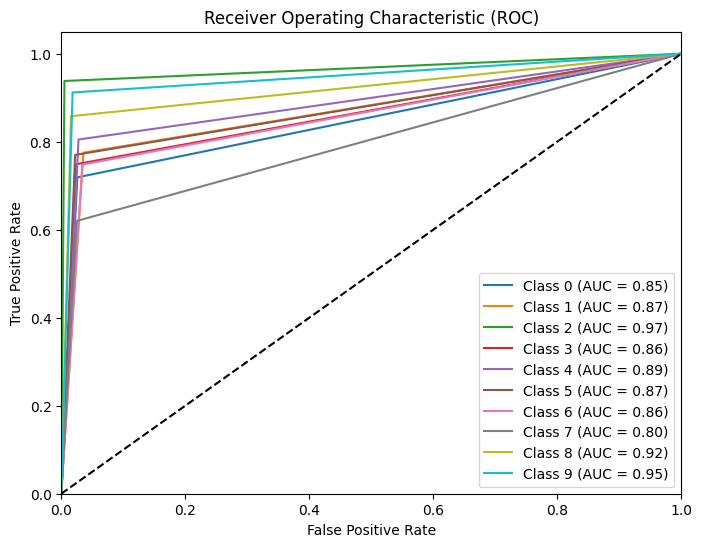

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier on the PCA-transformed training data
decision_tree.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)
# Perform predictions on the PCA-transformed test data
predictions = decision_tree.predict(kannda_mnist_test_images_pca)
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
# Calculate the probabilities for each class
probabilities = decision_tree.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.14      0.12      1007
           1       0.11      0.11      0.11       984
           2       0.09      0.11      0.10       992
           3       0.10      0.13      0.11      1005
           4       0.11      0.09      0.10      1063
           5       0.11      0.11      0.11       967
           6       0.11      0.11      0.11      1001
           7       0.09      0.06      0.07       954
           8       0.10      0.07      0.08       999
           9       0.11      0.09      0.10      1028

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Confusion Matrix:
[[138  98 136 133 101  91  87  68  74  81]
 [130 112 111 138 102  80 104  78  57  72]
 [165  88 107 132  87  86 107  71  65  84]
 [134 111 111 135  86  94  99  66  89  80]
 [136 113 103 143  97 102 11

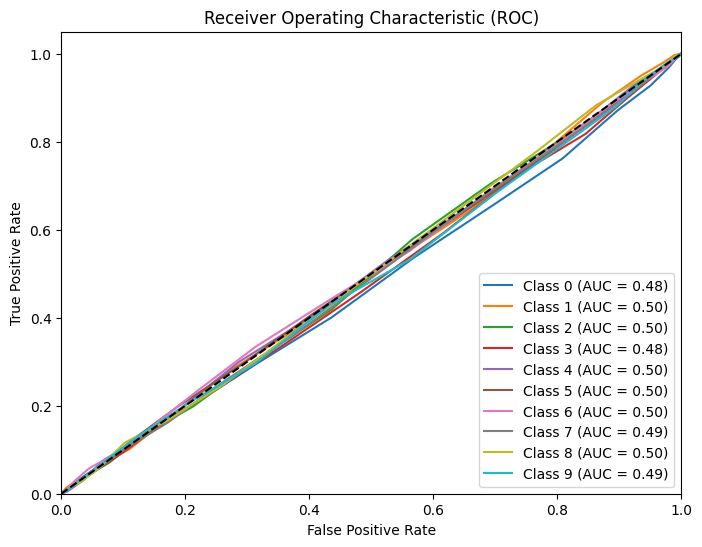

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest classifier on the dig_mnist dataset
random_forest.fit(dig_mnist, labels_for_dig_mnist)

# Make predictions on the kannda_mnist_test dataset
predictions = random_forest.predict(kannda_mnist_test)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(true_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = random_forest.predict_proba(kannda_mnist_test)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##Naive Bayes Model

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.05      0.09      1000
           1       0.41      0.36      0.38      1000
           2       0.96      0.85      0.90      1000
           3       0.39      0.09      0.15      1000
           4       0.50      0.74      0.60      1000
           5       0.97      0.29      0.45      1000
           6       0.36      0.47      0.41      1000
           7       0.47      0.61      0.53      1000
           8       0.81      0.42      0.56      1000
           9       0.32      0.94      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.55      0.48      0.45     10000
weighted avg       0.55      0.48      0.45     10000

Confusion Matrix:
[[ 52 402   0  28  34   0 106  21   2 355]
 [ 12 363   1   6   4   0  94  48   1 471]
 [  7   6 846  73   2   1   5  28   7  25]
 [  0   4   1  92 243   0 230 169   2 259]
 [  1   0   0   0 743   2 10

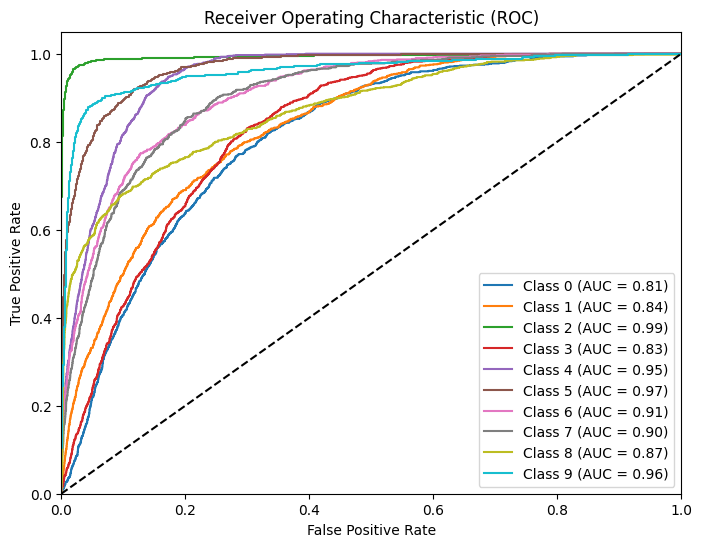

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the dig_mnist dataset
naive_bayes.fit(dig_mnist_images_pca, dig_mnist_labels)

# Make predictions on the kannda_mnist_test dataset
predictions = naive_bayes.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(kannda_mnist_test_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class using the OvR strategy
probabilities = naive_bayes.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' % (class_label, roc_auc[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##K-NN Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.23      0.25      1000
           1       0.44      0.84      0.58      1000
           2       0.85      0.95      0.90      1000
           3       0.62      0.20      0.30      1000
           4       0.51      0.80      0.62      1000
           5       0.94      0.50      0.65      1000
           6       0.60      0.45      0.51      1000
           7       0.42      0.29      0.35      1000
           8       0.95      0.45      0.61      1000
           9       0.49      0.90      0.63      1000

    accuracy                           0.56     10000
   macro avg       0.61      0.56      0.54     10000
weighted avg       0.61      0.56      0.54     10000

Confusion Matrix:
[[229 532   1  38  57   0  50  28   5  60]
 [ 18 843  16   8  77   1   3   6   1  27]
 [  1   4 947  18   4   0  13   9   0   4]
 [280 163  63 198 191   1  12  15   3  74]
 [ 17  55  15   2 797   4  1

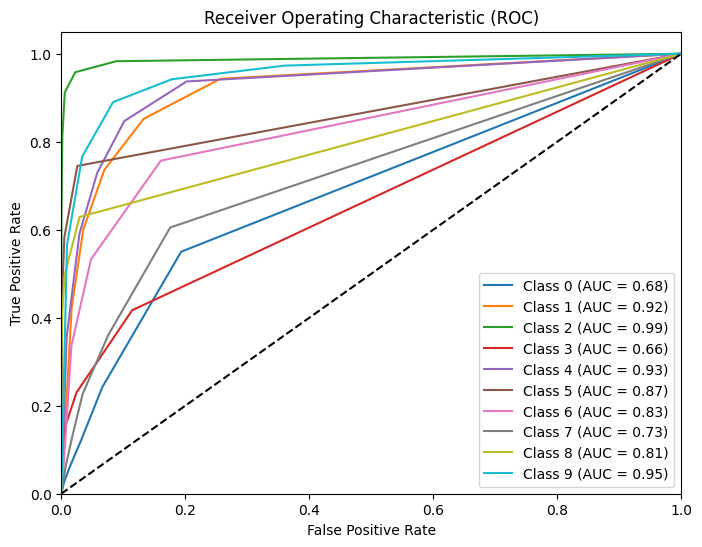

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier on the dig_mnist dataset
knn.fit(dig_mnist_images_pca, dig_mnist_labels)

# Make predictions on the kannda_mnist_test dataset
predictions = knn.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(kannda_mnist_test_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = knn.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = auc(
        fpr[class_label], tpr[class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label],
             label='Class %d (AUC = %0.2f)' % (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##SVM

C:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1007
           1       0.00      0.00      0.00       984
           2       0.10      1.00      0.18       992
           3       0.00      0.00      0.00      1005
           4       0.00      0.00      0.00      1063
           5       0.00      0.00      0.00       967
           6       0.00      0.00      0.00      1001
           7       0.00      0.00      0.00       954
           8       0.00      0.00      0.00       999
           9       0.00      0.00      0.00      1028

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion Matrix:
[[   0    0 1007    0    0    0    0    0    0    0]
 [   0    0  984    0    0    0    0    0    0    0]
 [   0    0  992    0    0    0    0    0    0    0]
 [   0    0 1005    0    0    0    0    0

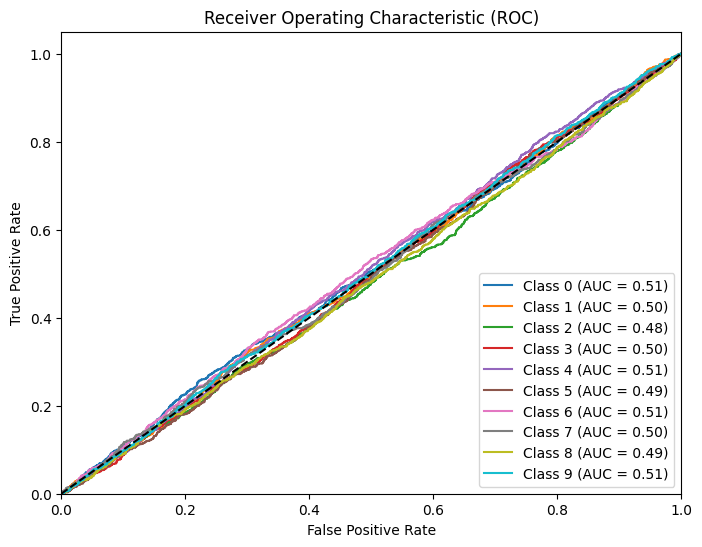

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create an SVM classifier
svm = SVC()

# Train the SVM classifier on the dig_mnist dataset
svm.fit(dig_mnist_images_pca, labels_for_dig_mnist)

# Make predictions on the kannda_mnist_test dataset
predictions = svm.predict(kannda_mnist_test_pca)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(true_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = svm.decision_function(kannda_mnist_test_pca)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label],
             label='Class %d (AUC = %0.2f)' % (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#component size : 20

In [74]:
import numpy as np
from sklearn.decomposition import PCA

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']

# Reshape the images to 2D arrays (flatten from 28x28 to 784 dimensions)
dig_mnist_images = dig_mnist_images.reshape((dig_mnist_images.shape[0], 28*28))
kannda_mnist_train_images = kannda_mnist_train_images.reshape((kannda_mnist_train_images.shape[0], 28*28))
kannda_mnist_test_images = kannda_mnist_test_images.reshape((kannda_mnist_test_images.shape[0], 28*28))

# Perform PCA with 20 components
pca = PCA(n_components=20)
dig_mnist_images_pca = pca.fit_transform(dig_mnist_images)
kannda_mnist_train_images_pca = pca.transform(kannda_mnist_train_images)
kannda_mnist_test_images_pca = pca.transform(kannda_mnist_test_images)

# Print the shapes of the transformed images
print("Shape of dig_mnist images (PCA):", dig_mnist_images_pca.shape)
print("Shape of kannda_mnist train images (PCA):", kannda_mnist_train_images_pca.shape)
print("Shape of kannda_mnist test images (PCA):", kannda_mnist_test_images_pca.shape)


Shape of dig_mnist images (PCA): (10240, 20)
Shape of kannda_mnist train images (PCA): (60000, 20)
Shape of kannda_mnist test images (PCA): (10000, 20)


In [ ]:
#descison tree

Precision: 0.7915731233810303
Recall: 0.7912999999999999
F1-Score: 0.7904800497911824
Confusion Matrix:
[[703 178   7  32  13   5   4  15  31  12]
 [ 73 782   2  45  14  30   4  19  18  13]
 [  3   6 945   9   4  22   3   4   2   2]
 [ 36  49   8 742  40  25  37  50   7   6]
 [ 10   6   3  41 829  46  11   7  27  20]
 [ 10  14   9  29 144 737  14   5  17  21]
 [ 10  17  11  54  27  14 754  87   4  22]
 [ 32  16   7  27  20   8 168 673  11  38]
 [ 44  17  14   9   9  27   2   7 851  20]
 [ 10  15   0   2   5   2   8  14  47 897]]
ROC-AUC Score: 0.8840555555555556


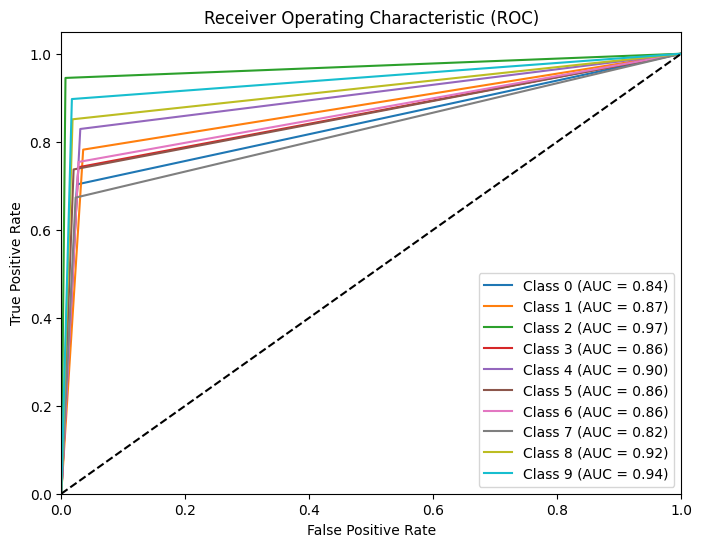

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier
decision_tree.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = decision_tree.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = decision_tree.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
###Random forest

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.12      0.11      1007
           1       0.11      0.12      0.11       984
           2       0.10      0.12      0.11       992
           3       0.10      0.13      0.11      1005
           4       0.11      0.10      0.11      1063
           5       0.09      0.08      0.08       967
           6       0.08      0.07      0.08      1001
           7       0.09      0.07      0.08       954
           8       0.11      0.09      0.10       999
           9       0.10      0.08      0.09      1028

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Confusion Matrix:
[[125  98 123 139  90  90  98  82  82  80]
 [133 115 106 112  86  86 101  80  82  83]
 [136 127 118 124  90  90  78  77  64  88]
 [145  92 123 130  87  82 101  74  78  93]
 [156 118 135 133 106  90 10

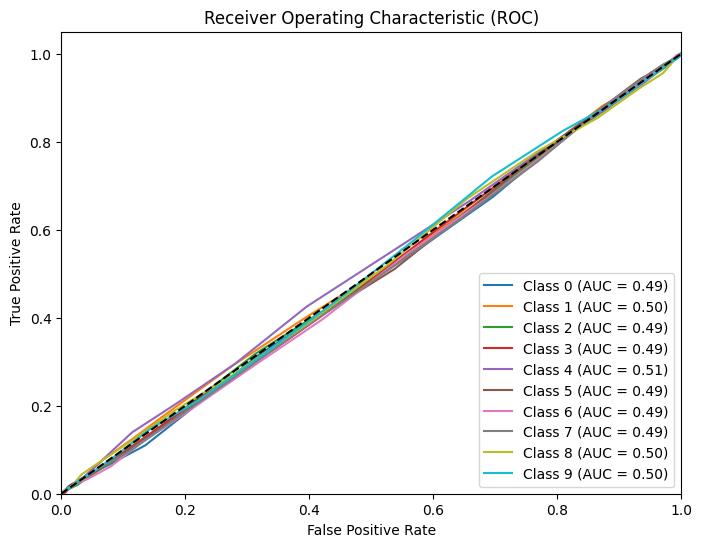

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest classifier on the dig_mnist dataset
random_forest.fit(dig_mnist, labels_for_dig_mnist)

# Make predictions on the kannda_mnist_test dataset
predictions = random_forest.predict(kannda_mnist_test)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(true_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = random_forest.predict_proba(kannda_mnist_test)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
###Naive Bayes Model

Precision: 0.7969848818933077
Recall: 0.786
F1-Score: 0.7861639453923205
Confusion Matrix:
[[616 222   1  56  57   0   1   8  34   5]
 [  8 747   1 100  81   9   0   2  36  16]
 [  6   1 947   9   2  21   1   9   2   2]
 [  7   3   4 816  89  31  13  34   2   1]
 [  1   0   0  23 877  55   2   9  28   5]
 [  0   3   7  24 246 679   6  19   9   7]
 [  0   2   8  27  21  79 779  69   2  13]
 [ 15  18   2  61  36   6 138 695   6  23]
 [ 53  12   5   1   8   6   2  20 842  51]
 [  3   3   0   1  15   0   1  36  79 862]]
ROC-AUC Score: 0.9740195999999999


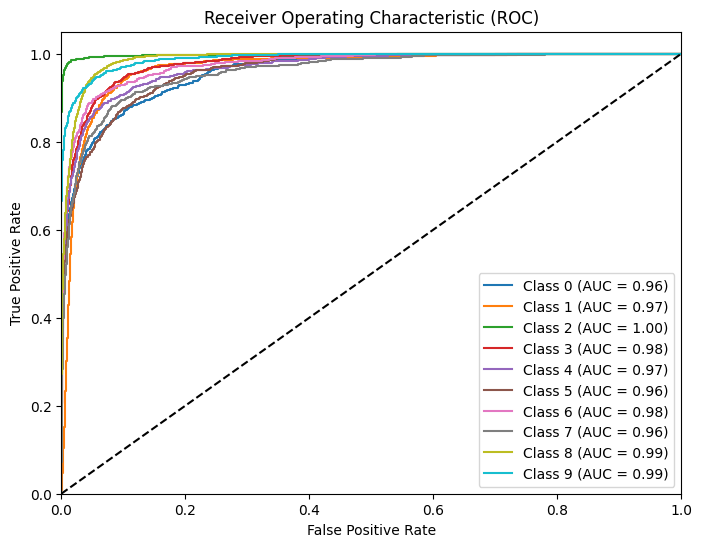

In [40]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = naive_bayes.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = naive_bayes.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##K-NN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = knn.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class (not applicable for KNN)

# Compute the ROC-AUC score (not applicable for KNN)

# Compute the ROC curve (not applicable for KNN)


Precision: 0.9138859846028037
Recall: 0.9077999999999999
F1-Score: 0.9079194431960265
Confusion Matrix:
[[808 173   0   6   8   0   0   1   2   2]
 [ 15 972   0   2   5   1   0   0   2   3]
 [  3   3 985   1   1   3   1   1   0   2]
 [ 24  27   0 881  35  18   1  14   0   0]
 [  0   2   0   9 979   8   1   0   1   0]
 [  0  10   0   7 132 845   2   1   3   0]
 [  4   2   0   7  20   7 899  43   2  16]
 [  7  20   0  21  35   3 107 799   0   8]
 [ 27   5   1   0   3   8   0   0 954   2]
 [  7   6   0   0   7   1   4   3  16 956]]


In [ ]:
###SVM

Precision: 0.9307015902653436
Recall: 0.9280999999999999
F1-Score: 0.9279045459799191
Confusion Matrix:
[[844 123   0  17  10   0   0   2   1   3]
 [ 13 962   0  10   7   2   1   0   1   4]
 [  3   1 991   1   1   2   1   0   0   0]
 [  9   8   1 918  20  22   5  15   2   0]
 [  1   0   0  13 973   5   2   0   3   3]
 [  1   5   0   6  93 891   1   2   1   0]
 [  2   1   1   8  15   2 941  12   2  16]
 [ 15  14   1  30  19   1  78 829   2  11]
 [ 20   1   2   1   1   7   0   0 963   5]
 [  6   6   0   0   2   0   1   3  13 969]]
ROC-AUC Score: 0.9964378888888887


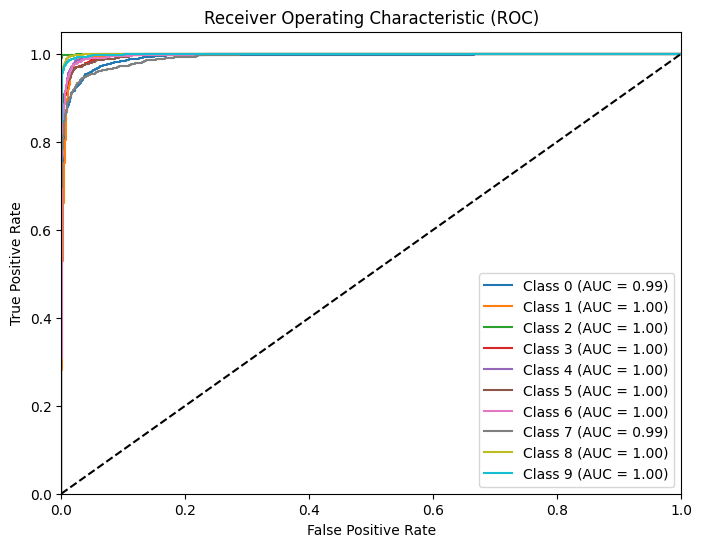

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an SVM classifier
svm = SVC(probability=True)

# Train the SVM classifier
svm.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = svm.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = svm.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## component size :25

In [76]:
import numpy as np
from sklearn.decomposition import PCA

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']

# Reshape the images to 2D arrays (flatten from 28x28 to 784 dimensions)
dig_mnist_images = dig_mnist_images.reshape((dig_mnist_images.shape[0], 28*28))
kannda_mnist_train_images = kannda_mnist_train_images.reshape((kannda_mnist_train_images.shape[0], 28*28))
kannda_mnist_test_images = kannda_mnist_test_images.reshape((kannda_mnist_test_images.shape[0], 28*28))

# Perform PCA with 25 components
pca = PCA(n_components=25)
dig_mnist_images_pca = pca.fit_transform(dig_mnist_images)
kannda_mnist_train_images_pca = pca.transform(kannda_mnist_train_images)
kannda_mnist_test_images_pca = pca.transform(kannda_mnist_test_images)

# Print the shapes of the transformed images
print("Shape of dig_mnist images (PCA):", dig_mnist_images_pca.shape)
print("Shape of kannda_mnist train images (PCA):", kannda_mnist_train_images_pca.shape)
print("Shape of kannda_mnist test images (PCA):", kannda_mnist_test_images_pca.shape)


Shape of dig_mnist images (PCA): (10240, 25)
Shape of kannda_mnist train images (PCA): (60000, 25)
Shape of kannda_mnist test images (PCA): (10000, 25)


In [ ]:
## decsion tree

Precision: 0.7925573877079954
Recall: 0.7922999999999999
F1-Score: 0.7917574904213792
Confusion Matrix:
[[721 163   6  37  13   1   2  19  31   7]
 [ 77 771   9  51  15  26  14  12   8  17]
 [  5   5 940   6   3  25   5   5   5   1]
 [ 39  44  11 732  44  28  31  57   6   8]
 [ 10  13   1  45 817  43  15  13  21  22]
 [  3  18  14  26 139 752  10   4  25   9]
 [ 11  23   8  48  25  14 752  89   6  24]
 [ 24  20   4  38  18  10 139 693  13  41]
 [ 42  15  11   5  10  25   3   7 860  22]
 [  9  17   7   4   5   0   8  14  51 885]]
ROC-AUC Score: 0.884611111111111


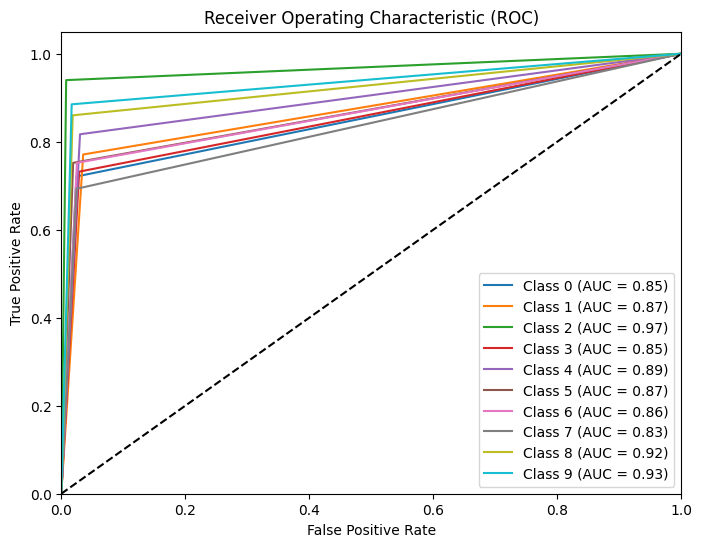

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier
decision_tree.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = decision_tree.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = decision_tree.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
###Random forest

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.14      0.12      1007
           1       0.09      0.10      0.10       984
           2       0.11      0.14      0.12       992
           3       0.11      0.14      0.12      1005
           4       0.10      0.09      0.09      1063
           5       0.09      0.08      0.08       967
           6       0.11      0.10      0.11      1001
           7       0.09      0.07      0.08       954
           8       0.10      0.07      0.08       999
           9       0.10      0.09      0.09      1028

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Confusion Matrix:
[[139 110 122 127  99  81  92  76  69  92]
 [118  99 111 135  95  87  98  75  77  89]
 [122 110 135 129  93  81  91  70  67  94]
 [122 112 117 140  99 100  81  68  72  94]
 [154  98 134 139  92  87 10

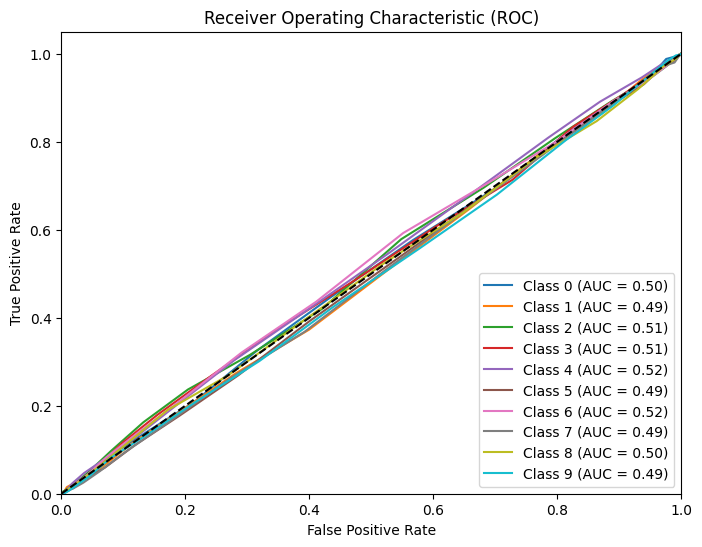

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest classifier on the dig_mnist dataset
random_forest.fit(dig_mnist, labels_for_dig_mnist)

# Make predictions on the kannda_mnist_test dataset
predictions = random_forest.predict(kannda_mnist_test)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(true_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = random_forest.predict_proba(kannda_mnist_test)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##Naive Bayes Model

Precision: 0.7993998623497869
Recall: 0.7927000000000001
F1-Score: 0.7924288894087136
Confusion Matrix:
[[660 208   1  49  33   0   1  10  33   5]
 [ 17 782   3  77  47  10   0   2  45  17]
 [  5   1 959   8   2  11   1   8   3   2]
 [ 10   2   3 818  76  34   8  46   3   0]
 [  1   0   0  22 868  65   4   9  23   8]
 [  0   1   6  22 243 680   3  30   7   8]
 [  2   0   5  28  24  73 784  67   0  17]
 [  6  20   2  73  22   8 164 674   5  26]
 [ 71  16   7   1   4   5   7  12 844  33]
 [  4   4   0   2  23   0   3  26  80 858]]
ROC-AUC Score: 0.9748219


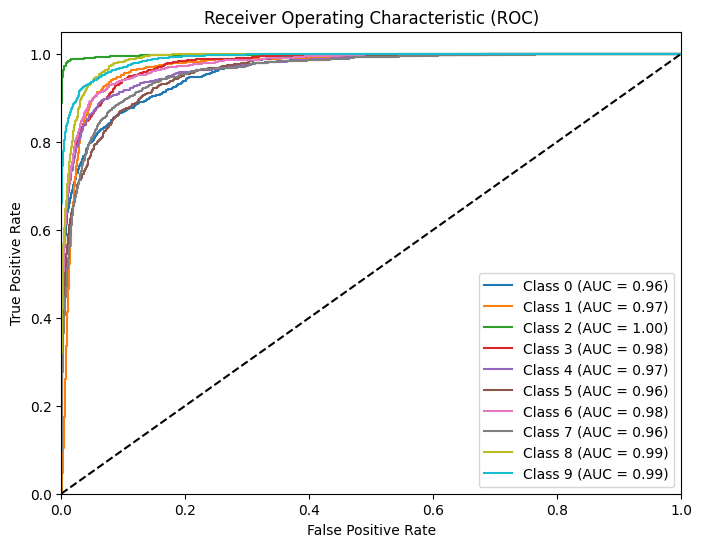

In [63]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = naive_bayes.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = naive_bayes.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = knn.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class (not applicable for KNN)

# Compute the ROC-AUC score (not applicable for KNN)

# Compute the ROC curve (not applicable for KNN)


Precision: 0.9224654619241919
Recall: 0.9174
F1-Score: 0.9175245001577206
Confusion Matrix:
[[836 153   0   3   4   0   0   1   2   1]
 [ 15 977   0   1   1   1   0   0   2   3]
 [  2   2 988   1   1   3   3   0   0   0]
 [ 18  21   0 899  34  16   2  10   0   0]
 [  0   2   0   6 980   6   1   1   3   1]
 [  2   4   0  11 119 858   2   1   2   1]
 [  4   2   0   8  18   9 903  39   2  15]
 [ 10  16   0  19  43   1  90 814   1   6]
 [ 23   7   1   0   2   2   0   0 963   2]
 [  8   9   0   0   4   2   6   3  12 956]]


Precision: 0.9372738732886873
Recall: 0.9349000000000001
F1-Score: 0.9347227333175836
Confusion Matrix:
[[850 127   0  13   3   0   0   2   3   2]
 [  9 969   1   7   7   1   0   0   3   3]
 [  2   1 991   1   2   1   1   1   0   0]
 [ 10   3   1 930  18  21   3  13   1   0]
 [  1   0   0  11 972   6   2   1   3   4]
 [  1   6   0   7  80 903   1   2   0   0]
 [  5   3   0   3  12   5 949   9   2  12]
 [ 16  12   1  20  20   2  78 840   3   8]
 [ 13   3   2   0   1   3   0   0 974   4]
 [  8   6   0   0   2   0   3   0  10 971]]
ROC-AUC Score: 0.9968415888888889


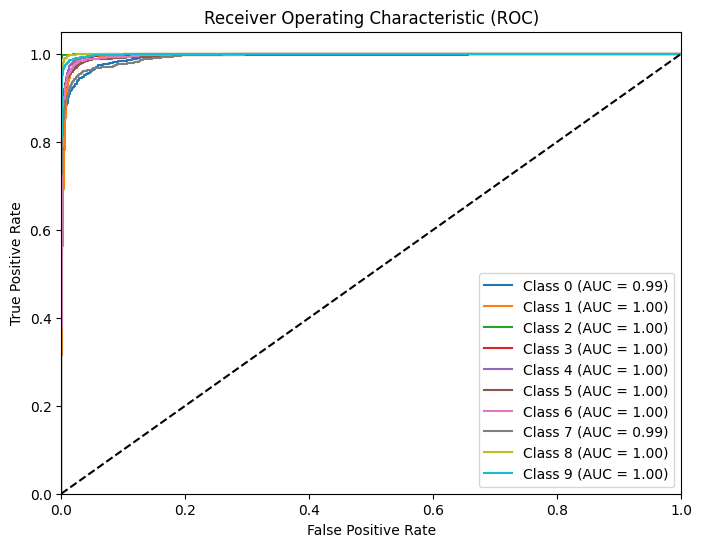

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an SVM classifier
svm = SVC(probability=True)

# Train the SVM classifier
svm.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = svm.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = svm.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
###component size:30

In [67]:
import numpy as np
from sklearn.decomposition import PCA

# Load dig_mnist dataset
dig_mnist_data = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\X_dig_MNIST.npz')
dig_mnist_images = dig_mnist_data['arr_0']
dig_mnist_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Dig_MNIST\y_dig_MNIST.npz')
dig_mnist_labels = dig_mnist_labels['arr_0']

# Load kannda_mnist dataset
kannda_mnist_train_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_train.npz')
kannda_mnist_train_images = kannda_mnist_train_data['arr_0']
kannda_mnist_train_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_train.npz')
kannda_mnist_train_labels = kannda_mnist_train_labels['arr_0']

kannda_mnist_test_data = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\X_kannada_MNIST_test.npz')
kannda_mnist_test_images = kannda_mnist_test_data['arr_0']
kannda_mnist_test_labels = np.load(r'C:\Users\SONY\Desktop\kannada\Kannada_MNIST\y_kannada_MNIST_test.npz')
kannda_mnist_test_labels = kannda_mnist_test_labels['arr_0']

# Reshape the images to 2D arrays (flatten from 28x28 to 784 dimensions)
dig_mnist_images = dig_mnist_images.reshape((dig_mnist_images.shape[0], 28*28))
kannda_mnist_train_images = kannda_mnist_train_images.reshape((kannda_mnist_train_images.shape[0], 28*28))
kannda_mnist_test_images = kannda_mnist_test_images.reshape((kannda_mnist_test_images.shape[0], 28*28))

# Perform PCA with 30 components
pca = PCA(n_components=30)
dig_mnist_images_pca = pca.fit_transform(dig_mnist_images)
kannda_mnist_train_images_pca = pca.transform(kannda_mnist_train_images)
kannda_mnist_test_images_pca = pca.transform(kannda_mnist_test_images)

# Print the shapes of the transformed images
print("Shape of dig_mnist images (PCA):", dig_mnist_images_pca.shape)
print("Shape of kannda_mnist train images (PCA):", kannda_mnist_train_images_pca.shape)
print("Shape of kannda_mnist test images (PCA):", kannda_mnist_test_images_pca.shape)


Shape of dig_mnist images (PCA): (10240, 30)
Shape of kannda_mnist train images (PCA): (60000, 30)
Shape of kannda_mnist test images (PCA): (10000, 30)


Precision: 0.7914168209356708
Recall: 0.7918000000000001
F1-Score: 0.7909334197812519
Confusion Matrix:
[[713 174   2  27  13   3   5  24  26  13]
 [ 66 794   7  41  19  17   8  23  10  15]
 [  5   3 940   5   7  25   3   7   2   3]
 [ 25  27  12 718  45  35  41  68  17  12]
 [  6   8   4  42 791  61   9  13  28  38]
 [ 10   8  10  32 127 768   6   6  24   9]
 [  9   8   9  34  15  12 776  93   9  35]
 [ 24  23   4  35  16   7 144 677  15  55]
 [ 44  14  12   5   9  22   3   4 864  23]
 [ 13  21   5   4   8   1  11  14  46 877]]
ROC-AUC Score: 0.8843333333333334


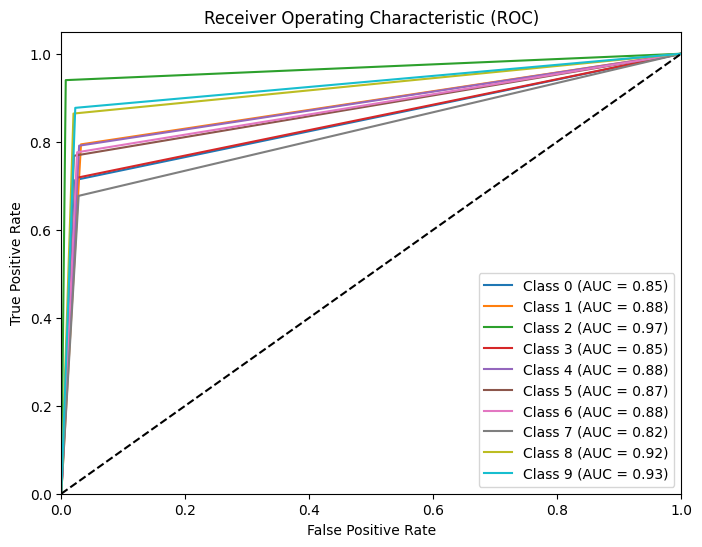

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier
decision_tree.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = decision_tree.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = decision_tree.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest classifier on the dig_mnist dataset
random_forest.fit(dig_mnist, labels_for_dig_mnist)

# Make predictions on the kannda_mnist_test dataset
predictions = random_forest.predict(kannda_mnist_test)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(true_labels, predictions)
print("Classification Report:")
print(classification_metrics)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = random_forest.predict_proba(kannda_mnist_test)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(num_classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (true_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##naive_bayes

Precision: 0.8080718773866424
Recall: 0.8026
F1-Score: 0.8019673074788953
Confusion Matrix:
[[664 201   1  54  21   0   0   7  47   5]
 [ 12 811   2  81  15   5   0   3  60  11]
 [  5   1 966   7   1   9   1   6   3   1]
 [ 13   2   3 817  75  35   6  46   3   0]
 [  1   0   0  10 885  47   4  13  33   7]
 [  0   1  11  34 207 698   6  26   7  10]
 [  2   1   6  14  28  86 783  63   0  17]
 [  4  12   2  49  34   8 162 699   5  25]
 [ 69  14   5   3   4   6   6   8 860  25]
 [  7   5   0   2  26   0   4  27  86 843]]
ROC-AUC Score: 0.9769201888888887


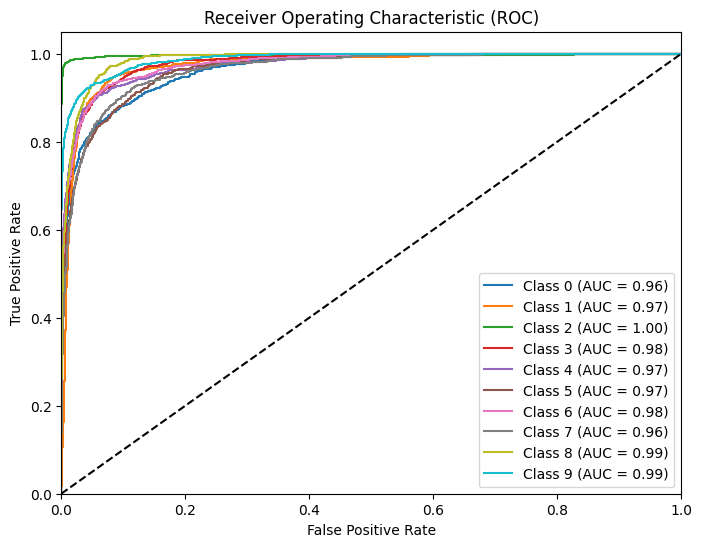

In [69]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = naive_bayes.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = naive_bayes.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##K-NN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = knn.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class (not applicable for KNN)

# Compute the ROC-AUC score (not applicable for KNN)

# Compute the ROC curve (not applicable for KNN)


Precision: 0.9264467422987741
Recall: 0.9218
F1-Score: 0.9217972604980774
Confusion Matrix:
[[832 156   0   4   6   0   0   0   1   1]
 [ 15 978   0   1   3   0   0   0   1   2]
 [  3   2 990   1   0   2   2   0   0   0]
 [ 16  15   0 917  24  16   1  11   0   0]
 [  0   1   0   6 981   3   3   0   5   1]
 [  1   1   3  11 118 862   2   0   2   0]
 [  2   2   0   7  20   6 910  36   1  16]
 [  8  11   0  26  39   2  90 819   0   5]
 [ 17   7   1   0   2   1   0   0 969   3]
 [  8   5   0   1   4   1   6   1  14 960]]


In [ ]:
##SVM

Precision: 0.9432374527436661
Recall: 0.9415999999999999
F1-Score: 0.9414071448140173
Confusion Matrix:
[[870 113   0  10   2   0   0   2   2   1]
 [  8 971   0   9   6   0   0   0   3   3]
 [  2   1 993   1   0   0   1   1   0   1]
 [  8   4   2 936  13  19   5  13   0   0]
 [  1   0   1  11 969   7   2   0   6   3]
 [  1   1   0   6  69 920   1   2   0   0]
 [  4   2   0   4  11   6 947   9   1  16]
 [ 16   9   1  18  18   1  73 853   1  10]
 [  5   1   1   0   1   1   0   0 988   3]
 [  8   6   0   0   1   0   1   0  15 969]]
ROC-AUC Score: 0.997405


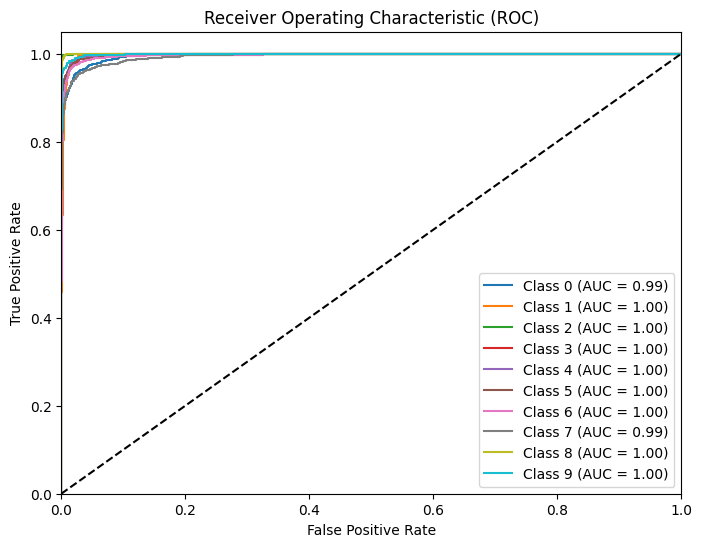

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an SVM classifier
svm = SVC(probability=True)

# Train the SVM classifier
svm.fit(kannda_mnist_train_images_pca, kannda_mnist_train_labels)

# Perform predictions on the test data
predictions = svm.predict(kannda_mnist_test_images_pca)

# Calculate precision, recall, and F1-score
precision = precision_score(kannda_mnist_test_labels, predictions, average='macro')
recall = recall_score(kannda_mnist_test_labels, predictions, average='macro')
f1 = f1_score(kannda_mnist_test_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(kannda_mnist_test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the probabilities for each class
probabilities = svm.predict_proba(kannda_mnist_test_images_pca)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(kannda_mnist_test_labels, probabilities, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_curve = dict()
for class_label in range(10):
    fpr[class_label], tpr[class_label], _ = roc_curve(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])
    roc_auc_curve[class_label] = roc_auc_score(
        (kannda_mnist_test_labels == class_label).astype(int),
        probabilities[:, class_label])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for class_label in range(10):
    plt.plot(fpr[class_label], tpr[class_label], label='Class %d (AUC = %0.2f)' %
             (class_label, roc_auc_curve[class_label]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
